# Transformermodellen for prediksjon av sekvenser


Målet med dette prosjektet er  å forstå hvordan dyp læring (deep learning) fungerer. Mer spesifikt skal vi implementere transformermodellen som er av hovedkomponentene i store språkmodeller som ChatGPT.

### Oppgave 1.1




Ønsker å gi et eksempel på hvordan et datasett {x,y} ser ut for å trene en transformermodell, for å predikere et heltall $d = a \cdot b + c$.




Velger $a = 56, b = 2, c = 72$, og dermed blir $d = a \cdot b + c = 184$. 




Har dermed $x = [a_0, a_1, b_0, c_0, c_1, d_0, d_1] = [5, 6, 2, 7, 2, 1, 8]$ og $y = \textbf{d} = [d_0, d_1, d_2] = [1, 8, 4]$.




Modellen gir $\hat{z} = [\hat{z_0}, ... , \hat{z_6}] = f_{\theta}(x) = f_{\theta}([5, 6, 2, 7, 2, 1, 8])$.




Transformermodellen ønsker å finne $\theta$ slik at $\hat{y} = [\hat{z_4}, \hat{z_5} , \hat{z_6}] = [1, 8, 4] = y$.






### Oppgave 1.2




Ønsker å vise hvordan vi kan bruke modellen til $f_{\theta}$ til å predikere d gitt a, b, c. Vi benytter verdiene fra oppgave 1.1.




\begin{align*}
& x^{(0)} = [a_0, a_1, b_0, c_0, c_1] = [5,6,2,7,2] & &[\hat{z_0}^{(0)}, \hat{z_1}^{(0)}, \hat{z_2}^{(0)}, \hat{z_3}^{(0)}, \hat{z_4}^{(0)}] = f_\theta (x^{(0)}) \\
&x^{(1)}=[5,6,2,7,2,\hat{z_4}^{(0)}] & &[\hat{z_0}^{(1)}, \hat{z_1}^{(1)}, ... , \hat{z_5}^{(1)}] = f_\theta (x^{(1)}) \\
&x^{(2)}=[5,6,2,7,2, \hat{z_4}^{(0)}, \hat{z_5}^{(1)}] & &[\hat{z_0}^{(2)}, ... , \hat{z_6}^{(2)}] = f_\theta (x^{(2)}) \\
& x^{(3)}=[5,6,2,7,2, \hat{z_4}^{(0)}, \hat{z_5}^{(1)}, \hat{z_6}^{(2)}]  & \\
&\hat{y} = [\hat{z_4}^{(0)},\hat{z_5}^{(1)},\hat{z_6}^{(2)}] & \\
\end{align*}




Vi kan dermed sammenlikne $\hat{y}$ med $c = [0, 9, 7]$ for å se om modellen fungerer.






### Oppgave 1.3




Diskret fordeling som gir objektfunksjon $\mathcal{L} (\theta, \mathcal{D}) = 0$ :




$\hat{y} =
\begin{bmatrix}
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0\\
1 & 0 & 0 & 0\\
\end{bmatrix}$




Som gir $\hat{y} = y$.




Fordi $\mathcal{L} (\theta, \mathcal{D}) = 0$, vil prediksjonen være perfekt.






### Oppgave 1.4




Finner først hvor mange enkeltparamtere hver parametermatrise W har, for så å finne totalt antall parametere.




$ W_E:    d \cdot m $




$ W_P:    d \cdot n_{max} $




$ W_U:    d \cdot m $




$\left. \begin{array}{r} 
W_0^{(l)}:    k \cdot d \\
W_V^{(l)}:    k \cdot d \\
W_Q^{(l)}:    k \cdot d \\
W_k^{(l)}:    k \cdot d \\
W_1^{(l)}:    k \cdot d \\
W_2^{(l)}:    k \cdot d \\
\end{array} \right\} 
 \cdot L $




Deretter adderer vi alt for å få totalt antall parametere.



Antall parametere = $2 \cdot d \cdot m + d \cdot n_{max} + 2 \cdot L \cdot (2 \cdot k \cdot d + p \cdot d )$



### Oppgave 1.5

Vi regner gjennom transformermodellen med alle antagelsene som er gitt, med input $ x = \begin{bmatrix} 1 \end{bmatrix} $.

$$
X = \text{onehot}(x) = \text{onehot}([1]) = 
\begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

$$
z_0 = W_E X + [W_P]_{0:1} =
\begin{bmatrix}
1 & 0\\
0 & \alpha \\
\end{bmatrix}
\cdot
\begin{bmatrix}
0\\
1\\
\end{bmatrix}
+ 
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
=
\begin{bmatrix}
0 + 0 \\
0 + \alpha \\
\end{bmatrix}
+
\begin{bmatrix}
1\\
0\\
\end{bmatrix}
=
\begin{bmatrix}
1 \\
\alpha \\
\end{bmatrix}
$$

$$
z_{\frac{1}{2}} =
\begin{bmatrix}
1 \\
\alpha \\
\end{bmatrix}
+
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
\alpha \\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 \\
\end{bmatrix}
=
\begin{bmatrix}
1 + 1 \\
\alpha + \alpha \\
\end{bmatrix}
= 2 \cdot
\begin{bmatrix}
1 \\
\alpha \\
\end{bmatrix}
$$

$$
z_1 = 2 \cdot
\begin{bmatrix}
1 \\
\alpha \\
\end{bmatrix}
+ 
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
\sigma 
\Bigg(
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
\cdot 2 
\begin{bmatrix}
1 \\
\alpha \\
\end{bmatrix}
\Bigg)
= 4 \cdot 
\begin{bmatrix}
1 \\
\alpha \\
\end{bmatrix}
$$

$$
Z = \text{softmax}_{\text{col}}
\Bigg(
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}
\cdot 4 
\begin{bmatrix}
1 \\
\alpha \\
\end{bmatrix}
\Bigg)
= 
\begin{bmatrix}
\frac{e^4}{e^4 + e^{4\alpha}} \\
\frac{e^{4\alpha}}{e^4 + e^{4\alpha}} \\
\end{bmatrix}
=
\frac{1}{e^4+e^{4\alpha}}
\cdot
\begin{bmatrix}
e^4 \\
e^{4\alpha} \\
\end{bmatrix}
$$

$$
\hat{z} = \text{argmax}_{\text{col}}
\Bigg(
\frac{1}{e^4+e^{4\alpha}}
\cdot
\begin{bmatrix}
e^4 \\
e^{4\alpha} \\
\end{bmatrix}
\Bigg)
$$

$
\hat{z} = \text{argmax}_{\text{col}}(z) =
\begin{bmatrix}
1 \\
\end{bmatrix}
$
dersom $ e^{4\alpha} > e^4 \Rightarrow \alpha > 1 $, som var det vi skulle vise.


### Oppgave 2.1

LinearLayer er en underklasse av Layer, og arver dermed alt av funksjoner og parametre som er definert i Layer. På samme måte vil alle de andre klassene som definerer et lag arve fra Layer. 

Når NeuralNetwork utfører en iterasjon av step_gd() vil den iterere gjennom hvert lag i den initierte listen "layers" og sjekke om laget tilhører en av klassene LinearLayer, EmbedPosition, FeedForward eller Attention. Dersom dette er oppfylt, vil det utføres en iterasjon av gradient descent (step_gd()) på laget. Dersom step_gd() ikke er definert i klassen laget tilhører, vil laget benytte funksjonen step_gd() som er definert i klassen Layer. Dersom step_gd() er definert i klassen laget tilhører, vil laget benytte step_gd() som er definert inne i sin egen klasse. 

Ettersom step_gd() ikke er definert i LinearLayer, vil LinearLayer utføre en iterasjon av gradient descent ved å bruke step_gd() som er definert i Layer.

## Oppgave 3

In [2]:
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
import numpy as np
from oppgave_3 import *
import matplotlib.pyplot as plt
from data_generators_corrected import get_train_test_sorting
from data_generators_corrected import get_train_test_addition

### Oppgave 3.1

Tester at lagene vi har implementert fungerer. Koden under er hentet fra den utdelte fila test_implementation.ipynb.

In [2]:
#We choose some arbitrary values for the dimensions
b = 6
n_max = 7
m = 8
n = 5

d = 10
k = 5
p = 20

#Create an arbitrary dataset
x = np.random.randint(0, m, (b,n))
y = np.random.randint(0, m, (b,n_max))

#initialize the layers
feed_forward = FeedForward(d,p)
attention = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()

#a manual forward pass
X = onehot(x, m)
z0 = embed_pos.forward(X)
z1 = feed_forward.forward(z0)
z2 = attention.forward(z1)
z3 = un_embed.forward(z2)
Z = softmax.forward(z3) 

#check the shapes
assert X.shape == (b,m,n), f"X.shape={X.shape}, expected {(b,m,n)}"
assert z0.shape == (b,d,n), f"z0.shape={z0.shape}, expected {(b,d,n)}"
assert z1.shape == (b,d,n), f"z1.shape={z1.shape}, expected {(b,d,n)}"
assert z2.shape == (b,d,n), f"z2.shape={z2.shape}, expected {(b,d,n)}"
assert z3.shape == (b,m,n), f"z3.shape={z3.shape}, expected {(b,m,n)}"
assert Z.shape == (b,m,n), f"Z.shape={Z.shape}, expected {(b,m,n)}"

#is X one-hot?
assert X.sum() == b*n, f"X.sum()={X.sum()}, expected {b*n}"

assert np.allclose(Z.sum(axis=1), 1), f"Z.sum(axis=1)={Z.sum(axis=1)}, expected {np.ones(b)}"
assert np.abs(Z.sum() - b*n) < 1e-5, f"Z.sum()={Z.sum()}, expected {b*n}"
assert np.all(Z>=0), f"Z={Z}, expected all entries to be non-negative"


In [3]:
#test the forward pass
x = np.random.randint(0, m, (b,n_max))
X = onehot(x, m)

#we test with a y that is shorter than the maximum length
n_y = n_max - 1
y = np.random.randint(0, m, (b,n_y))

#initialize a neural network based on the layers above
network = NeuralNetwork([embed_pos, feed_forward, attention, un_embed, softmax])
#and a loss function
loss = CrossEntropy()

#do a forward pass
Z = network.forward(X)

#compute the loss
L = loss.forward(Z, y)

#get the derivative of the loss wrt Z
grad_Z = loss.backward()

#and perform a backward pass
_ = network.backward(grad_Z)

#and and do a gradient descent step
_ = network.step_gd(0.01)

In [4]:
#check if loss is non-negative
assert L >= 0, f"L={L}, expected L>=0"
assert grad_Z.shape == Z.shape, f"grad_Z.shape={grad_Z.shape}, expected {Z.shape}"

#check if onehot(y) gives zero loss
Y = onehot(y, m)
L = loss.forward(Y, y)
assert L < 1e-5, f"L={L}, expected L<1e-5"


### Oppgave 3.3

Benytter treningsalgoritmen som ble implementert i oppgave 3.2 for å løse sorteringsproblemet. Algoritme 4 er implementert i funksjonen trening_av_nevralt_nettverk(), som ligger i fila oppgave_3.py. 

Sorterer først sekvenser med 5 siffer, der sifrene er enten 0 eller 1. 

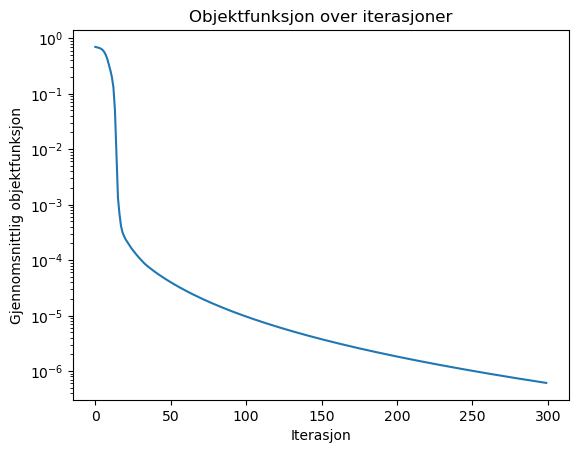

In [5]:
# definerer konstanter
d = 10
k = 5
p = 15
r = 5
m = 2
n_max = 2*r-1

# initialiserer lagene
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()

# henter treningsdata
D = get_train_test_sorting(r, m, samples_per_batch=100,n_batches_train=10, n_batches_test=1)
x_train = D['x_train']
y_train = D['y_train']

# initialiserer et nevralt nettverk basert på lagene ovenfor
network = NeuralNetwork([embed_pos, feed_forward1, attention1, feed_forward2, attention2, un_embed, softmax])

# trener på sortering
loss_trening = trening_av_nevralt_nettverk(network, loss, x_train, y_train, m, n_batches=10, n_iter = 300, alpha=0.01, beta1=0.9, beta2=0.999)

In [6]:
resultat_sortering = sorting_data(D, m, network, r)
print(f'{resultat_sortering*100} % av sekvensene ble sortert riktig.')

100.0 % av sekvensene ble sortert riktig.


Det er kun mulig å generere $2^5 = 32$ sekvenser med lengde $r=5$ med $0$ og $1$. Altså får transformermodellen god øving på disse sekvensene, og det er ikke mulig å teste på nye sekvenser. Det er ikke overraskende at vi får $100$% riktig, da transformermodellen har trent på alle sekvensene som blir testet.

Tester så å sortere sekvenser med 7 siffer, der hvert siffer $x_i \in [0,4]$.

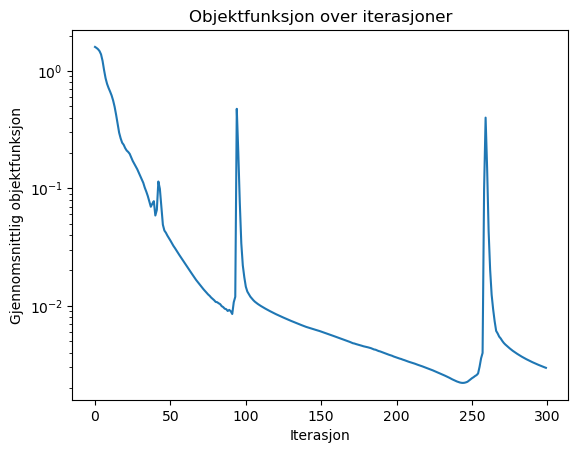

In [36]:
# definerer konstanter
d = 20
k = 10
p = 25
r = 7
m = 5
n_max = 2*r-1


# initialiserer lagene
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()

# henter data til sortering
B = get_train_test_sorting(r, m, samples_per_batch=250,n_batches_train=10, n_batches_test=1)

x_train = B['x_train']
y_train = B['y_train']


# initialiserer et nevralt nettverk basert på lagene ovenfor 
network = NeuralNetwork([embed_pos, feed_forward1, attention1, feed_forward2, attention2, un_embed, softmax])

# trener transformermodellen
loss_trening = trening_av_nevralt_nettverk(network, loss, x_train, y_train, m, n_batches=10, n_iter = 300, alpha=0.01, beta1=0.9, beta2=0.999)

Som man kan se, vil objektfunksjonen bli lavere og lavere, men kan gjøre noen hopp her og der. Transformermodellen vil prøve å stadig minimere objektfunksjonen. I de tilfellene der det finnes mange ulike sekvenser, vil det være vanskelig for modellen å bli helt presis. Det kan tyde på at modellen i noen tilfeller har litt større vanskeligheter for å predikere enkelte datapunkter, og at det gir store utslag på objektfunksjonen. Modellen fortsetter så å tilpasse seg, og totalt sett minker dermed objektfunksjonen. 

In [37]:
resultat_sortering = sorting_data(B, m, network, r)
print(f'{resultat_sortering*100} % av sekvensene ble sortert riktig.')

100.0 % av sekvensene ble sortert riktig.


Ettersom verdien til objektfunksjonen $(\mathcal{L})$ blir veldig lav, er det å forvente at transformermodellen klarer å sortere de aller fleste av sekvensene riktig. Ved flere kjøringer får vi litt ulikt resultat. Noen ganger får vi full uttelling, og andre ganger blir andelen riktig sorterte sekvenser litt lavere, men fortsatt over 90% med de betingelsene som er gitt.

### Oppgave 3.4

For å trene opp det nevrale nettverket implementeres treningsalgoritmen skrevet i oppgave 3.2. Her brukes den til å predikere summen av to tosifrede tall. 

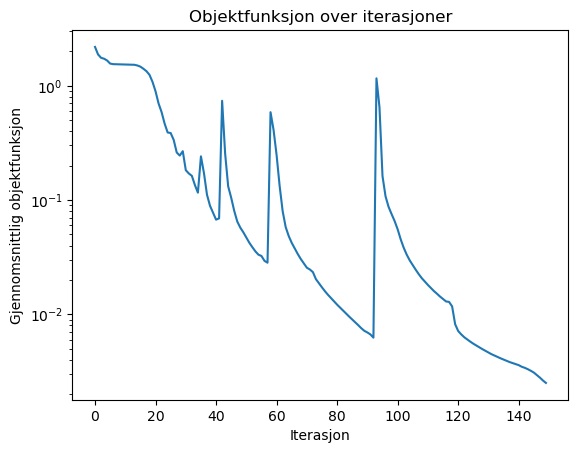

In [3]:
# definerer konstanter
d = 30
k = 20
p = 40

n_digit = 2
n_max = 3*n_digit
m = 10

# initialiserer lagene
feed_forward1 = FeedForward(d,p)
attention1 = Attention(d,k)
feed_forward2 = FeedForward(d,p)
attention2 = Attention(d,k)
feed_forward3 = FeedForward(d,p)
attention3 = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()
loss = CrossEntropy()

# definerer input i treningsdata
samples_per_batch = 250
n_batches_train = 20
n_batches_test = 1

# henter treningsdata
E = get_train_test_addition(n_digit,samples_per_batch, n_batches_train, n_batches_test)

x_train = E['x_train']
y_train = E['y_train']

# initialiserer et nevralt nettverk basert på lagene definert ovenfor
network = NeuralNetwork([embed_pos, feed_forward1, attention1, feed_forward2, attention2, feed_forward3, attention3, un_embed, softmax])

# utfører trening av modellen på addisjon
loss_trening = trening_av_nevralt_nettverk(network, loss, x_train, y_train, m, n_batches=20, n_iter = 150, alpha=0.01, beta1=0.9, beta2=0.999)

In [4]:
resultat_addisjon = adding_data(E, m, network, n_digit)
print(f'For den opprinnelige modellen for addisjonsproblemet ble {round(resultat_addisjon*100,1)} % av datapunkene predikert riktig.')

For den opprinnelige modellen for addisjonsproblemet ble 100.0 % av datapunkene predikert riktig.


In [8]:
Data = alle_tosifrede_tall()

resultat_addisjon = adding_data(Data, m, network, n_digit)

print(f'{round(resultat_addisjon*100,1)} % av alle de mulige 10 000 tallparene ble predikert riktig.')

97.0 % av alle de mulige 10 000 tallparene ble predikert riktig.


Også for addisjon blir verdien til objektfunksjonen $(\mathcal{L})$ veldig lav, og det er ikke uforventet at andelen riktig predikerte løsninger blir såpass høy. Når vi tester "Data" (altså alle de 10 000 parene av tosifrede tall), får vi litt lavere andel riktig predikerte løsninger enn når vi tester på test-dataen hentet fra "E". Grunnen til dette er at "Data" inneholder enda flere sekvenser som modellen ikke har trent på, og det er dermed større sannsynlighet for at modellen gjetter feil på noen av datapunktene. Generelt sett gir det mening at modellen lykkes i de aller fleste tilfellene, og hadde vi innført flere iterasjoner eller datasett i treningen, ville transformermodellen trolig blitt enda bedre.